In [1]:
import csv
import time

In [2]:
def read(filename, date_idx, date_parse, year, bucket=7):
    days_in_year = 365
    
    freq = {}
    for period in range(0, int(days_in_year / bucket)):
        freq[period] = 0
        
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader:
            if row[date_idx] == '':
                continue
            
            t = time.strptime(row[date_idx], date_parse)
            if t.tm_year == year and t.tm_yday < (days_in_year-1):
                freq[int(t.tm_yday / bucket)] += 1
    
    return freq


In [3]:
freq = read('311.csv', 1, '%m/%d/%Y %H:%M:%S %p', 2014)

In [4]:
freq

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 10889,
 22: 40240,
 23: 42125,
 24: 42673,
 25: 41721,
 26: 38446,
 27: 41915,
 28: 41008,
 29: 39011,
 30: 36069,
 31: 38821,
 32: 37050,
 33: 36967,
 34: 26834,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0}

Num samples 52


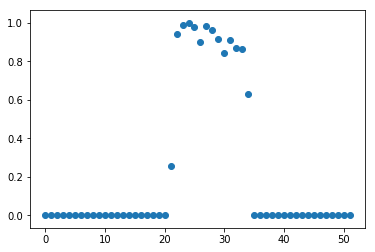

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X_train = np.asarray(list(freq.keys()))
Y_train = np.asarray(list(freq.values()))
print("Num samples", str(len(X_train)))
maxY = np.max(Y_train)
Y_train = Y_train / np.max(Y_train)

plt.scatter(X_train, Y_train)
plt.show()

In [263]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, mu, sig):
    return tf.div(tf.negative(tf.pow(tf.subtract(X, mu), 2.)), tf.multiply(2., tf.pow(sig, 2.)))

mu = tf.Variable(18., name="mu")
sig = tf.Variable(21.5, name="sig")
y_model = model(X, mu, sig)

In [264]:
cost = tf.square(Y-y_model)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [265]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [266]:
for epoch in range(training_epochs):
    for(x, y) in zip(X_train, Y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [267]:
mu_val = sess.run(mu)
sig_val = sess.run(sig)

In [268]:
print(mu_val)
print(sig_val)

19.438864
23.140743


In [269]:
sess.close()

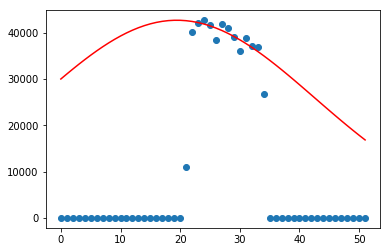

Prediction of week 35 35940.02835380378
Actual week 35 36967.0


In [272]:
Y_train = maxY * Y_train
plt.scatter(X_train, Y_train)
trY2 = maxY * (np.exp(-np.power(X_train - mu_val, 2.) / (2 * np.power(sig_val, 2.))))
plt.plot(X_train, trY2, 'r')
plt.show()
print("Prediction of week 35", trY2[33])
print("Actual week 35", Y_train[33])

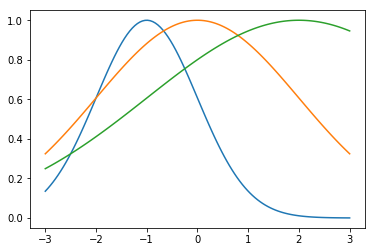

In [163]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x_values = np.linspace(-3, 3, 120)
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

# Try a polynomial model
We'll try a polynomial model now just to see.

In [241]:
learning_rate = 0.01
training_epochs = 40

#num_coeffs = 6
num_coeffs = 2
#trY_coeffs = [1, 2, 3, 4, 5, 6]
trY_coeffs = [1, 2]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [242]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = (tf.pow(Y-y_model, 2))

In [243]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [244]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [245]:
for epoch in range(training_epochs):
    for(x, y) in zip(X_train, Y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})

In [246]:
w_val = sess.run(w)
print(w_val)

[nan nan]


In [247]:
sess.close()

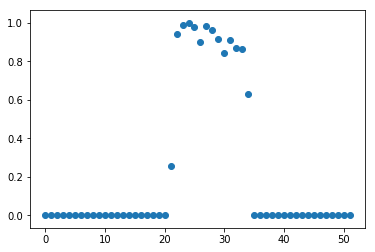

In [248]:
plt.scatter(X_train, Y_train)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(X_train, i)
plt.plot(X_train, trY2, 'r')
plt.show()